In [294]:
library(Seurat)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(dplyr)
library(ggplot2)
library(bedr)
library(SeuratDisk)
source("/home/vsevim/prj/workflows/catatac/secondary/plot_enrichment.R")

In [295]:
# My parameters
h5_name = "/home/vsevim/prj/tf/CATATAC_4/analysis/secondary/TF2CRISPR2/seurat/CATATAC_4_TF2CRISPR2_ONLY_SINGLETS.h5seurat"
protosp_path = "/home/vsevim/prj/tf/CATATAC_4/analysis/primary/TF2CRISPR2/resources/protospacers_TF2.csv"

# Load protospacer file

In [296]:
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [297]:
tfs_w_ntctl    = unique(df_protosp$X.TargetGene)
unselect_ntctl = (tfs_w_ntctl != "NTCTL") & (tfs_w_ntctl != "NTCTRL")
tfs_to_plot    = tfs_w_ntctl[unselect_ntctl]

guides_to_plot  = df_protosp$GuideName
tfs_to_plot
guides_to_plot

[1] "OTP"   "MYF6"  "MEIS1" "FLI1"  "HHEX"  "HOXA6" "ELF5"  "GBX1"  "DPRX"

[1] "OTP_1"   "OTP_2"   "MYF6_1"  "MYF6_2"  "MEIS1_1" "MEIS1_2" "FLI1_1" 
 [8] "FLI1_2"  "HHEX_1"  "HHEX_2"  "HOXA6_1" "HOXA6_2" "ELF5_1"  "ELF5_2" 
[15] "GBX1_1"  "GBX1_2"  "DPRX_1"  "DPRX_2"  "NTCTL_1" "NTCTL_2"

# Load Seurat object

In [298]:
# seurat <- LoadH5Seurat(h5_name)
# seurat <- RenameIdents(seurat, '5' = 'iPSC')
# seurat <- RenameIdents(seurat, '8' = 'MEIS1')
# seurat <- RenameIdents(seurat, '17' = 'ELF5')
# seurat <- RenameIdents(seurat, '13' = 'OTP')
# seurat <- RenameIdents(seurat, '12' = 'MYF6')

# seurat$celltype <- Idents(seurat)

# unique(Idents(seurat))

# Differential expression + gene set enrichment

Displaying top  10  hits with adj_pval <=  0.05 
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Cellular_Component_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying PanglaoDB_Augmented_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Descartes_Cell_Types_and_Tissue_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Human_Gene_Atlas... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Tabula_Sapiens... Done.
Parsing results... Done.

Skipping Tabula_Sapiens . No hits with adj pval <  0.05 
Uploading data to Enrichr... Done.
  Querying Azimuth_Cell_Types_2021... Done.
Parsing results... Done.

 150 markers found for OTP 
Displaying top  10  hits 

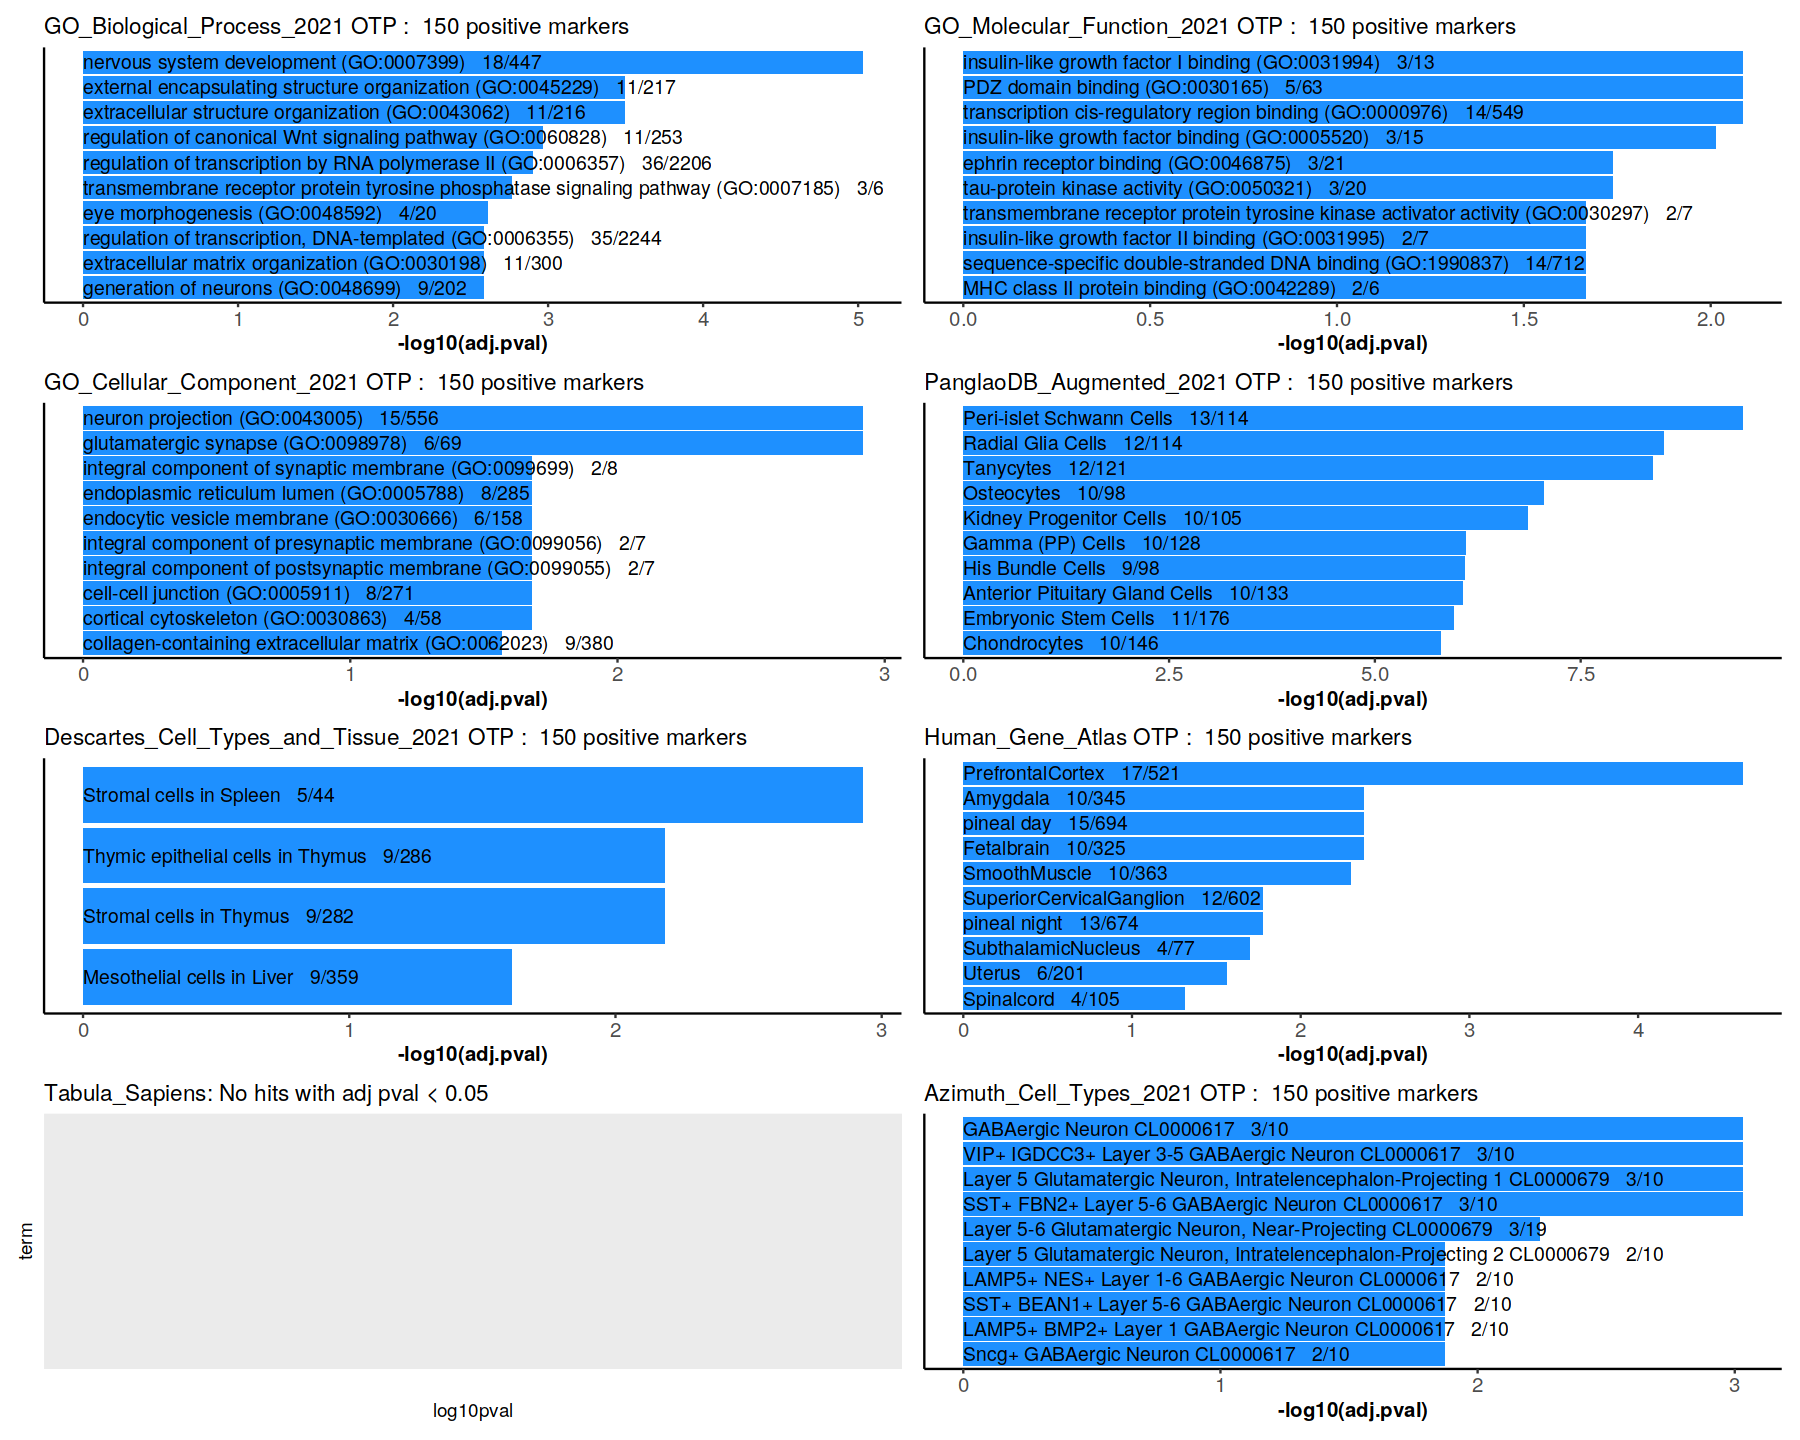

Displaying top  10  hits with adj_pval <=  0.05 
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Cellular_Component_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying PanglaoDB_Augmented_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Descartes_Cell_Types_and_Tissue_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Human_Gene_Atlas... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Tabula_Sapiens... Done.
Parsing results... Done.

Skipping Tabula_Sapiens . No hits with adj pval <  0.05 
Uploading data to Enrichr... Done.
  Querying Azimuth_Cell_Types_2021... Done.
Parsing results... Done.

 132 markers found for MEIS1 


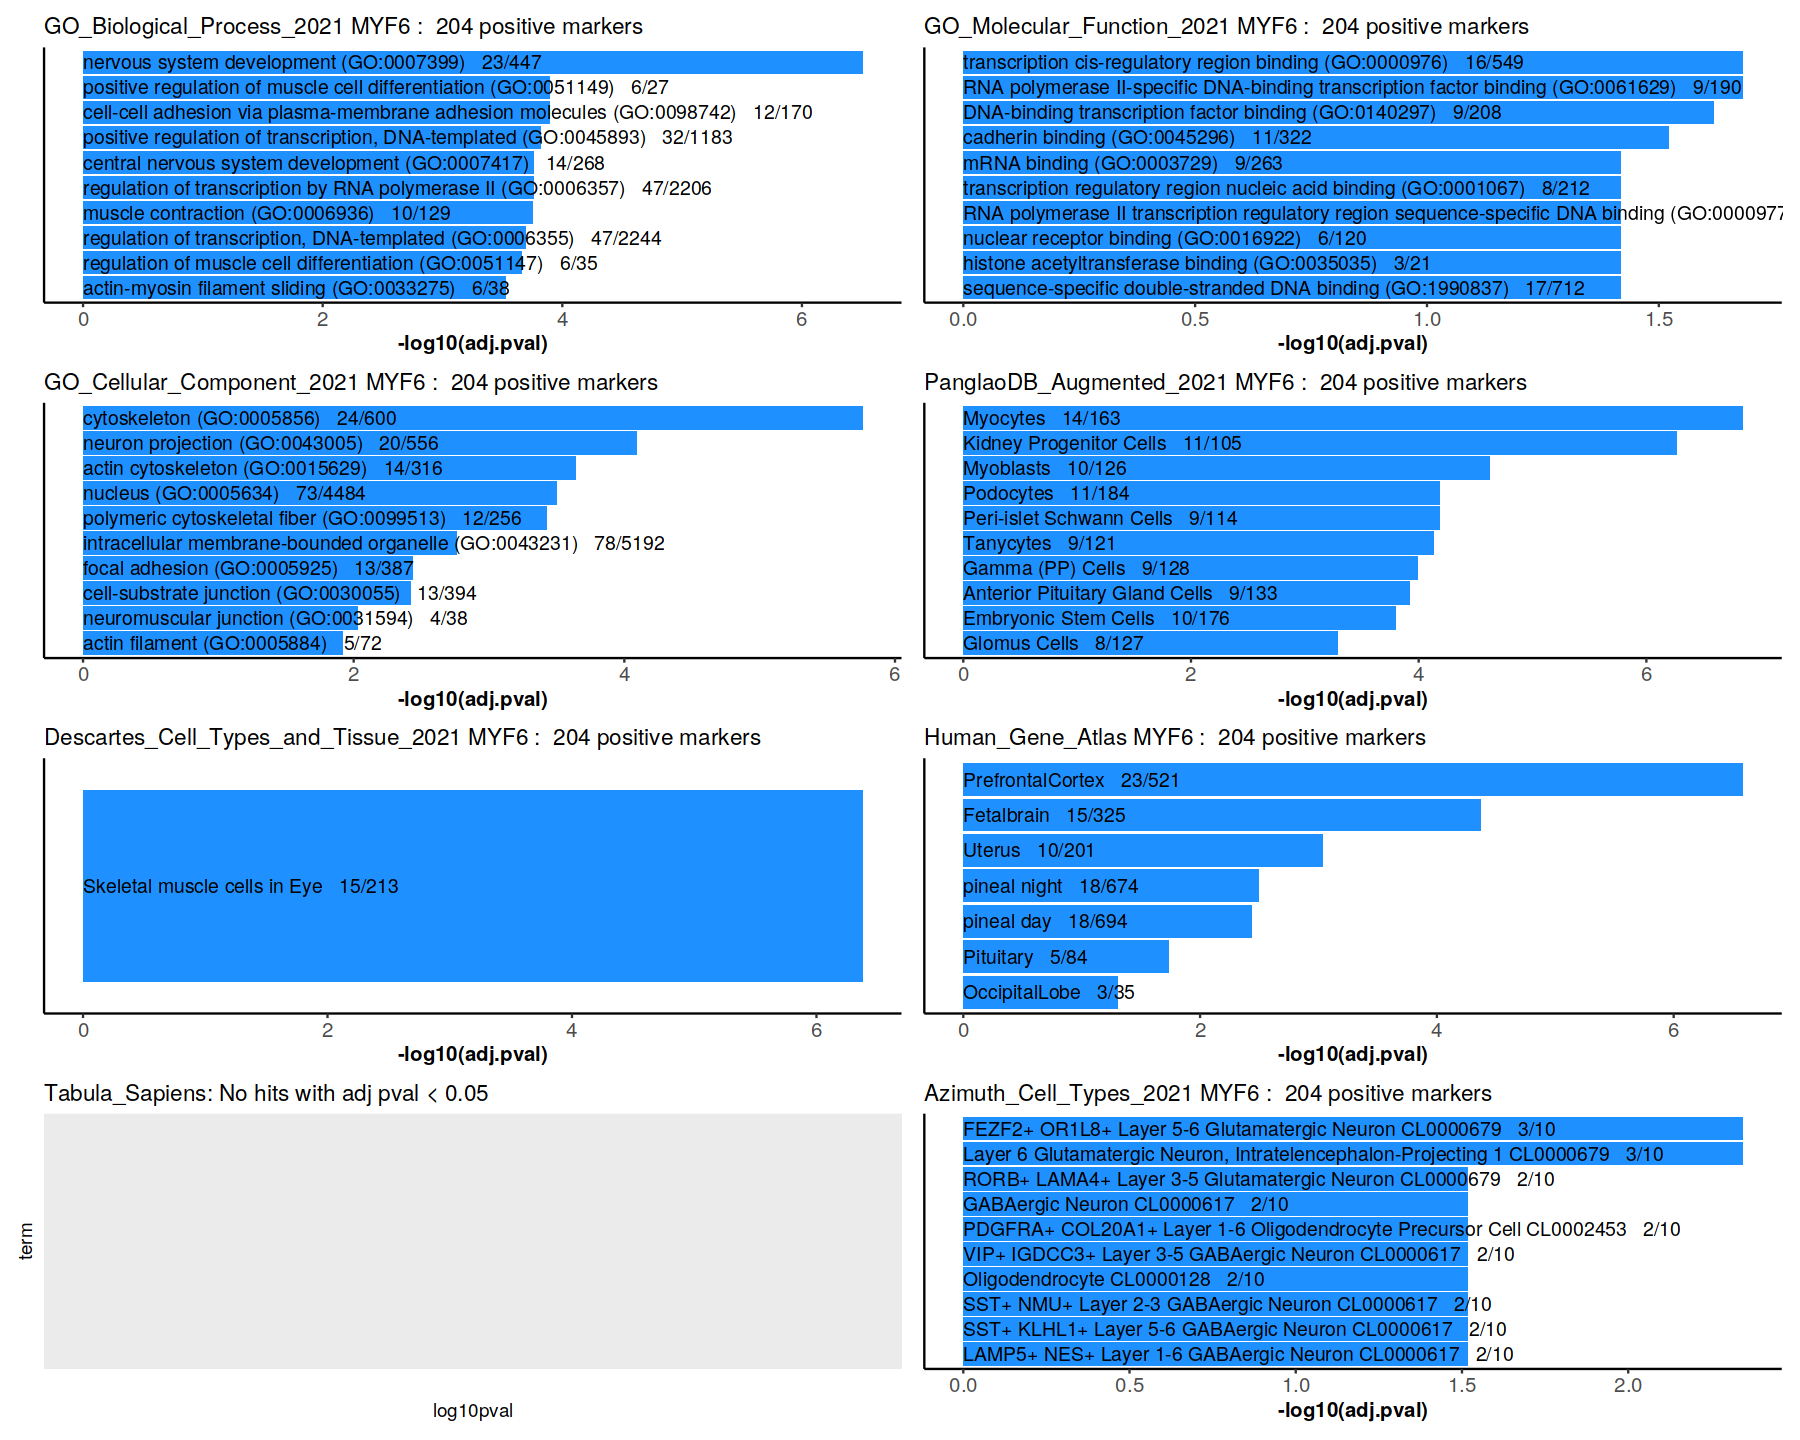

Displaying top  10  hits with adj_pval <=  0.05 
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Cellular_Component_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying PanglaoDB_Augmented_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Descartes_Cell_Types_and_Tissue_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Human_Gene_Atlas... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying Tabula_Sapiens... Done.
Parsing results... Done.

Skipping Tabula_Sapiens . No hits with adj pval <  0.05 
Uploading data to Enrichr... Done.
  Querying Azimuth_Cell_Types_2021... Done.
Parsing results... Done.

Skipping Azimuth_Cell_Types_2021 . No hits with adj p

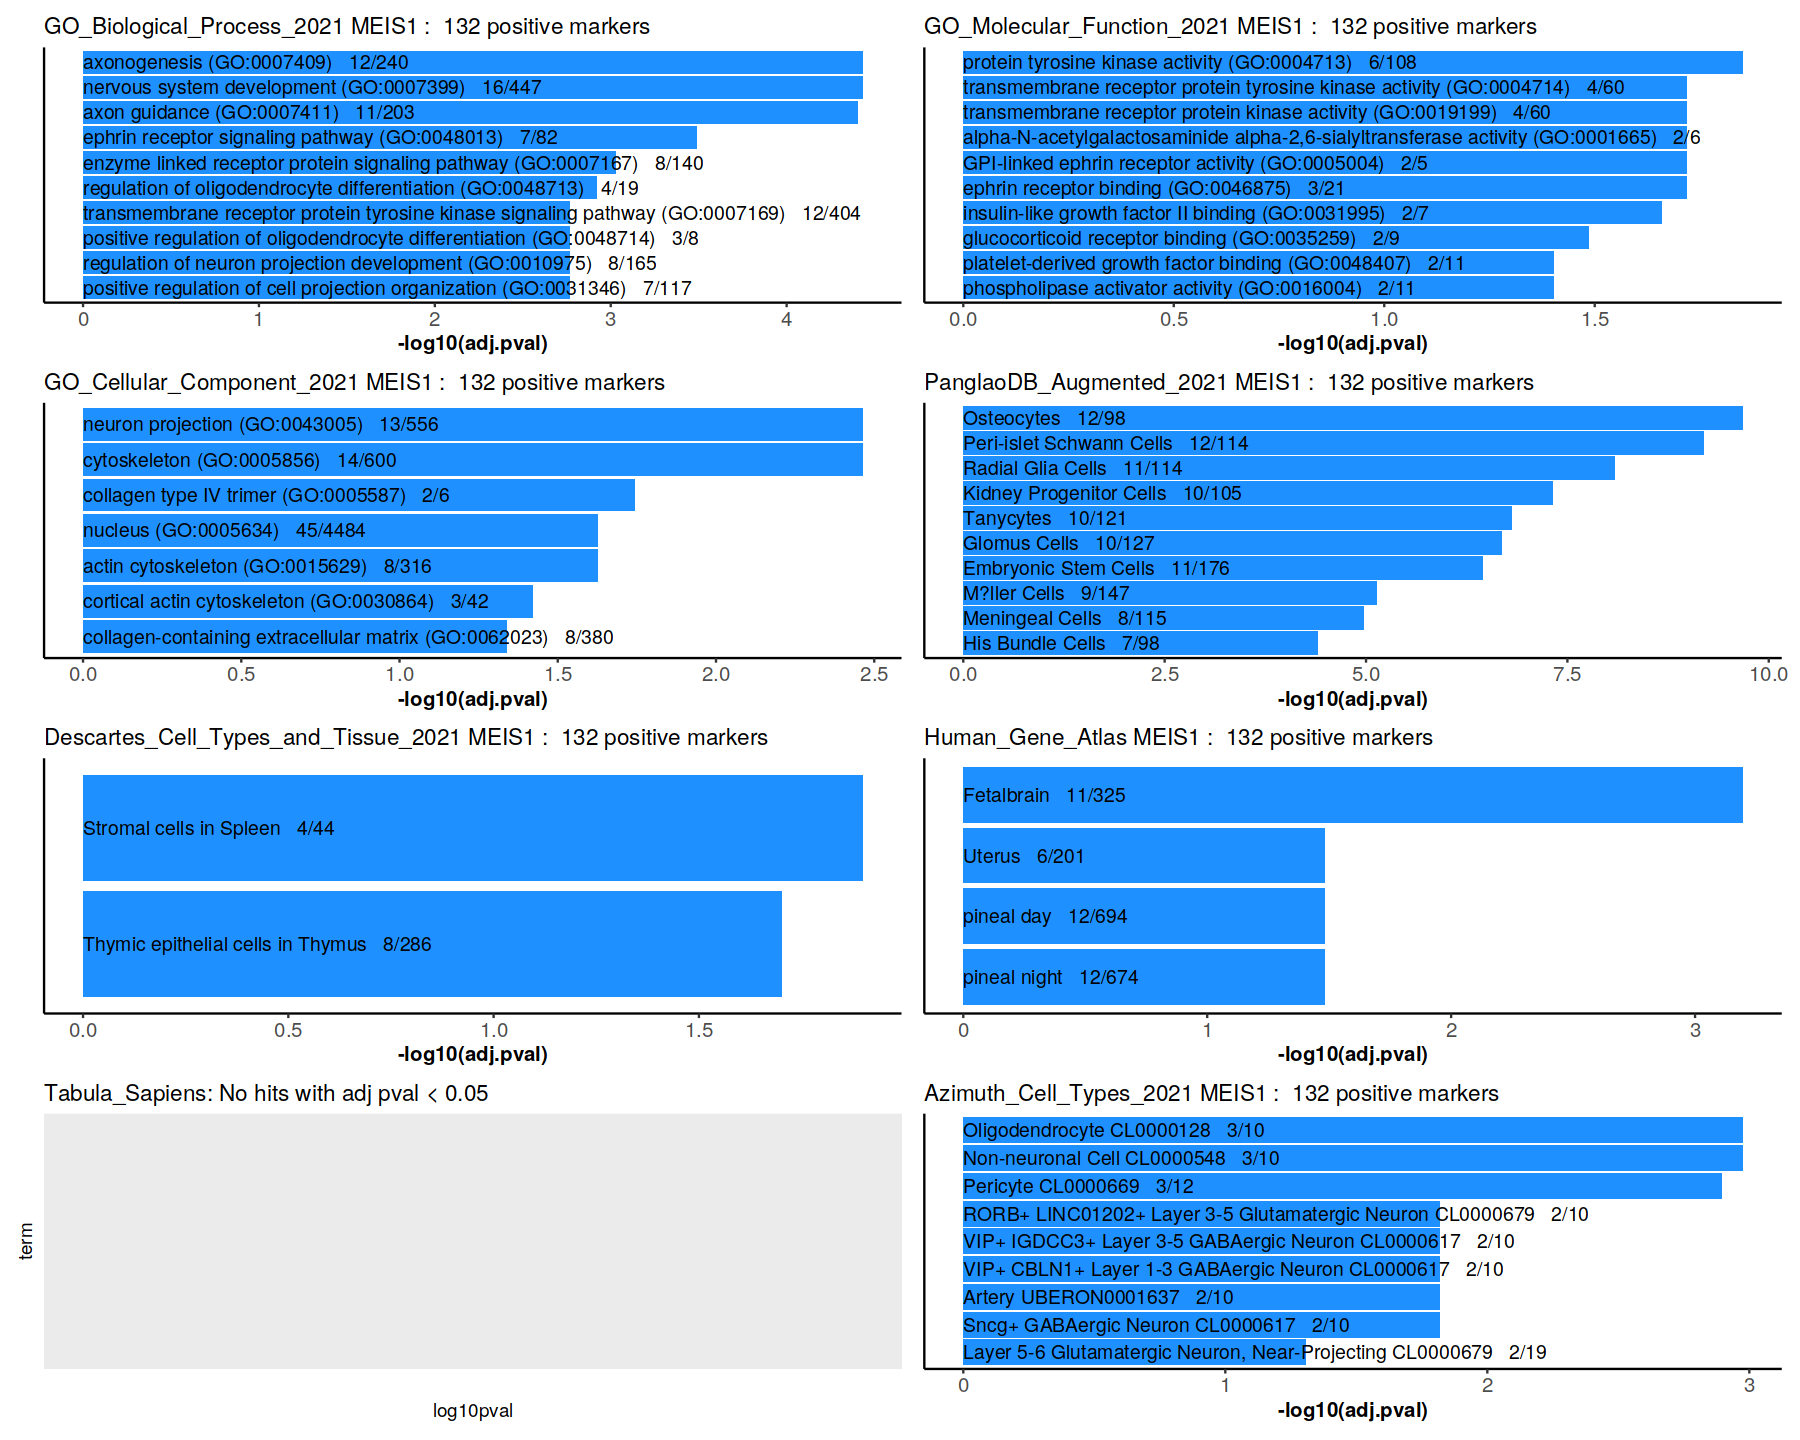

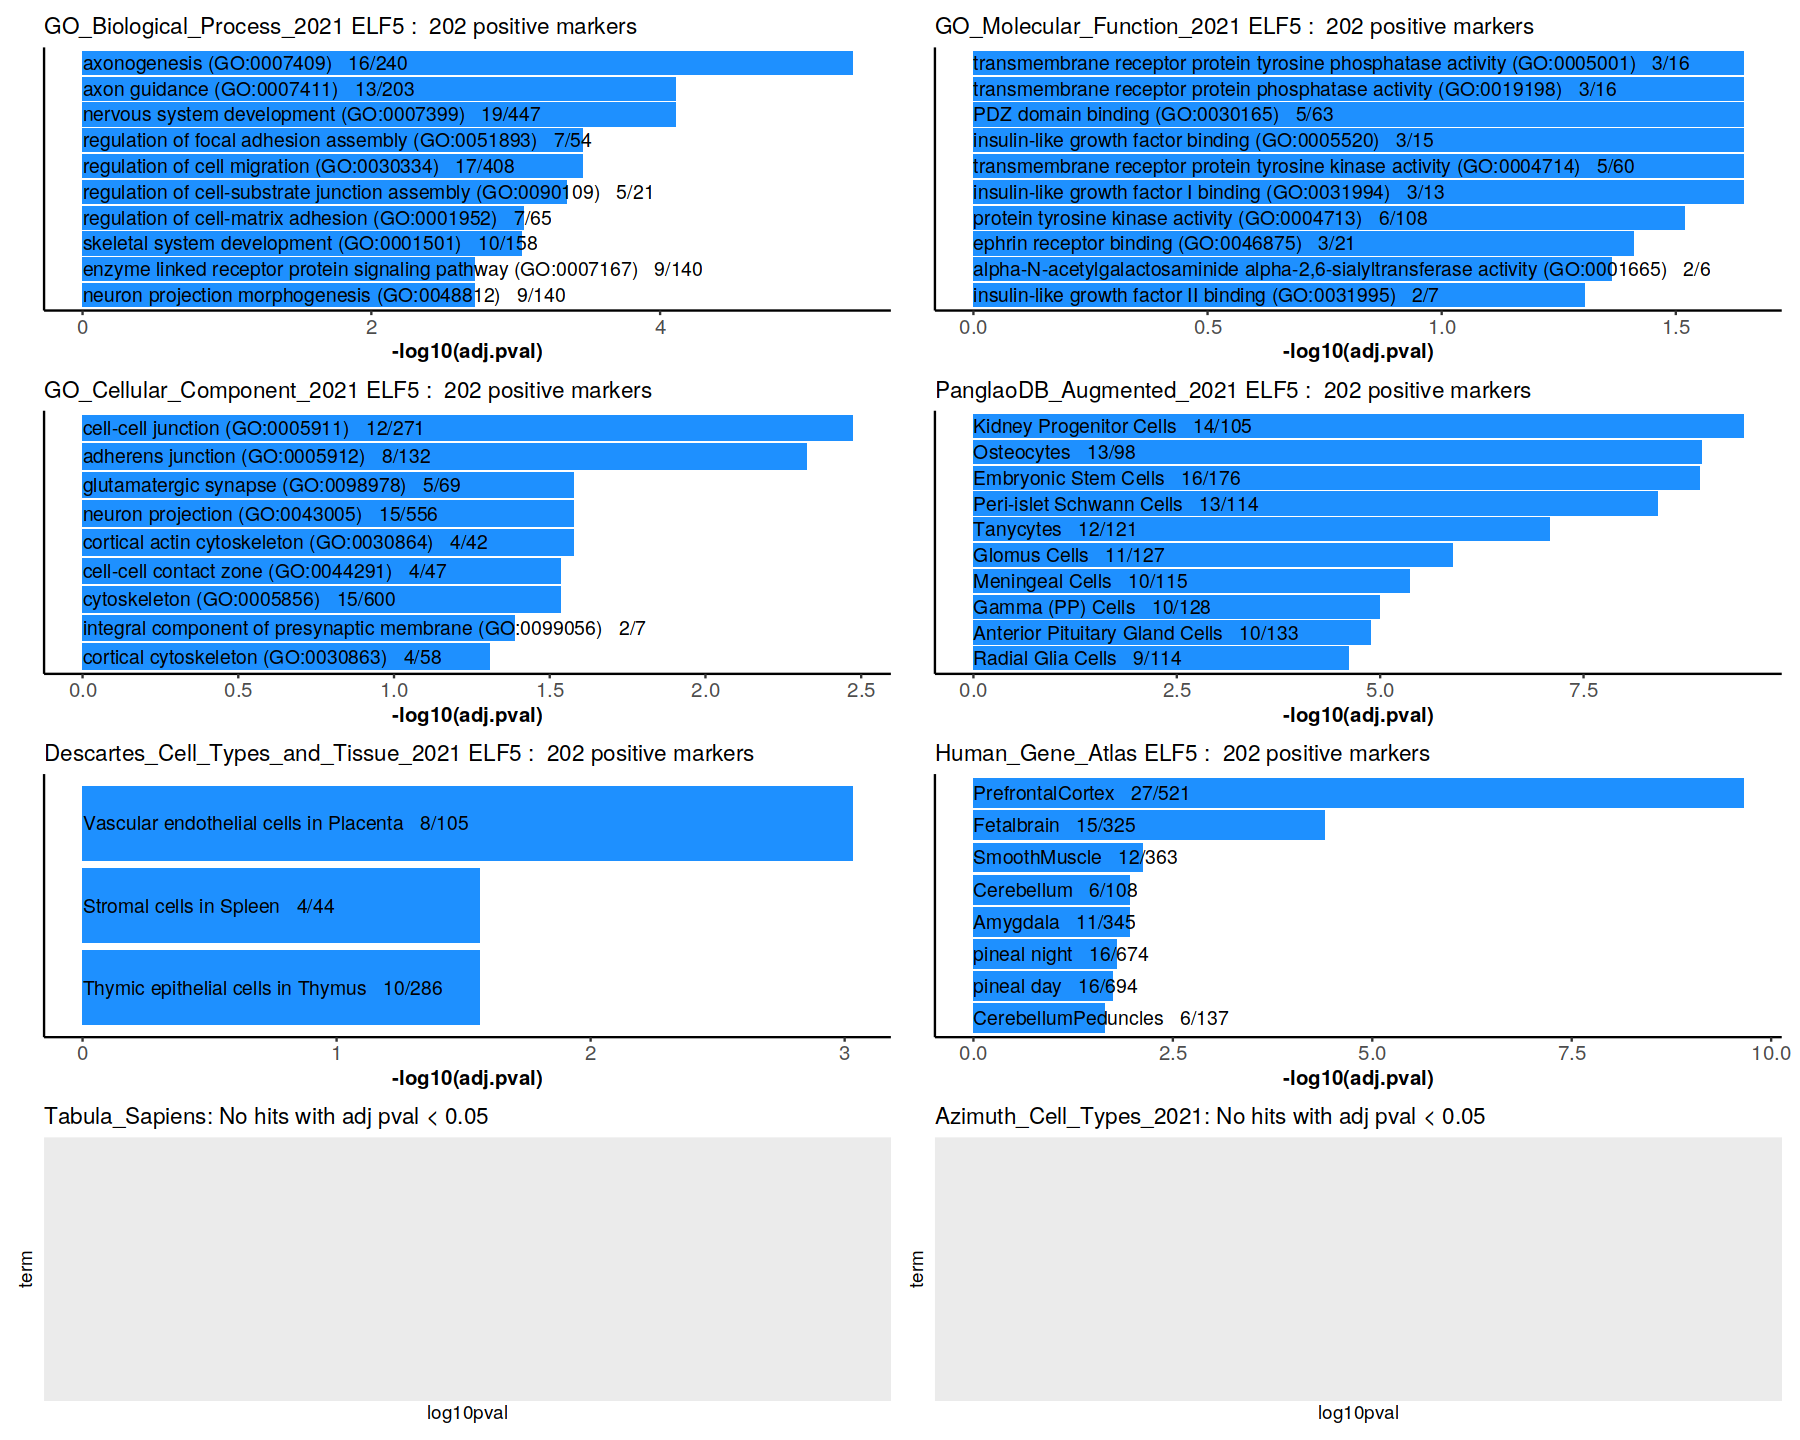

In [312]:
source("/home/vsevim/prj/workflows/catatac/secondary/plot_enrichment.R")
options(repr.plot.width=15, repr.plot.height=12)
cluster_list = c("OTP", "MYF6", "MEIS1", "ELF5")

for(cluster_id in cluster_list) {
    enrich_ret_vals <- plot_enrichment(
        seurat_obj = seurat,      
        auroc_cutoff = 0.70,
        cluster_id = cluster_id,
        enrichment_pval_cutoff = 0.05,
        n_max_hits = 10
    )    
    print(enrich_ret_vals[[1]])
}